In [164]:
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Bidirectional
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
from datetime import datetime

In [165]:
# %load_ext tensorboard
# import tensorboard
# tensorboard.__version__

In [166]:
def preprocess_data(timeseries_data,k):
    X,Y=list(),list()
    for i in range(len(timeseries_data)):
        endidx=i+k
        if endidx>len(timeseries_data)-1:
            break
        x=timeseries_data[i:endidx]
        y=timeseries_data[endidx]
        X.append(x)
        Y.append(y)
    return X,Y

In [167]:
timeseries_data=[10, 20, 30, 40, 50, 60, 70, 80, 90]
k=3
X,Y=preprocess_data(timeseries_data,k)

In [177]:
X=np.array(X).astype(np.float32)
Y=np.array(Y).astype(np.float32)
print(X),print(Y)

[[[10.]
  [20.]
  [30.]]

 [[20.]
  [30.]
  [40.]]

 [[30.]
  [40.]
  [50.]]

 [[40.]
  [50.]
  [60.]]

 [[50.]
  [60.]
  [70.]]

 [[60.]
  [70.]
  [80.]]]
[40. 50. 60. 70. 80. 90.]


(None, None)

In [178]:
n=1
X=X.reshape((X.shape[0],X.shape[1],n))
X.shape

(6, 3, 1)

In [179]:
# !rm -rf ./logs/ 
# logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = callbacks.TensorBoard(log_dir=logdir)

In [197]:
model=Sequential()
model.add(Bidirectional(LSTM(50,activation='relu',input_shape=(k,n))))
# model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
history=model.fit(X,Y,epochs=300,verbose=1)

Epoch 1/300
1/1 [==============================] - 0s 16ms/step - loss: 5091.5923
Epoch 2/300
1/1 [==============================] - 0s 0s/step - loss: 5021.1514
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 4950.4434
Epoch 4/300
1/1 [==============================] - 0s 5ms/step - loss: 4879.4263
Epoch 5/300
1/1 [==============================] - 0s 0s/step - loss: 4808.1055
Epoch 6/300
1/1 [==============================] - 0s 0s/step - loss: 4736.5454
Epoch 7/300
1/1 [==============================] - 0s 0s/step - loss: 4664.8037
Epoch 8/300
1/1 [==============================] - 0s 3ms/step - loss: 4592.8872
Epoch 9/300
1/1 [==============================] - 0s 4ms/step - loss: 4520.7695
Epoch 10/300
1/1 [==============================] - 0s 3ms/step - loss: 4448.3911
Epoch 11/300
1/1 [==============================] - 0s 5ms/step - loss: 4375.7500
Epoch 12/300
1/1 [==============================] - 0s 0s/step - loss: 4302.6699
Epoch 13/300
1/1 [===========

1/1 [==============================] - 0s 998us/step - loss: 3.0108
Epoch 103/300
1/1 [==============================] - 0s 2ms/step - loss: 2.6522
Epoch 104/300
1/1 [==============================] - 0s 2ms/step - loss: 2.3517
Epoch 105/300
1/1 [==============================] - 0s 3ms/step - loss: 2.1384
Epoch 106/300
1/1 [==============================] - 0s 2ms/step - loss: 1.9809
Epoch 107/300
1/1 [==============================] - 0s 3ms/step - loss: 1.8226
Epoch 108/300
1/1 [==============================] - 0s 2ms/step - loss: 1.6386
Epoch 109/300
1/1 [==============================] - 0s 3ms/step - loss: 1.4612
Epoch 110/300
1/1 [==============================] - 0s 997us/step - loss: 1.3383
Epoch 111/300
1/1 [==============================] - 0s 995us/step - loss: 1.2656
Epoch 112/300
1/1 [==============================] - 0s 3ms/step - loss: 1.2180
Epoch 113/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1667
Epoch 114/300
1/1 [=============================

1/1 [==============================] - 0s 2ms/step - loss: 0.0745
Epoch 205/300
1/1 [==============================] - 0s 997us/step - loss: 0.0727
Epoch 206/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0714
Epoch 207/300
1/1 [==============================] - 0s 5ms/step - loss: 0.0697
Epoch 208/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0681
Epoch 209/300
1/1 [==============================] - 0s 0s/step - loss: 0.0666
Epoch 210/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0652
Epoch 211/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0637
Epoch 212/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0624
Epoch 213/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0610
Epoch 214/300
1/1 [==============================] - 0s 5ms/step - loss: 0.0596
Epoch 215/300
1/1 [==============================] - 0s 996us/step - loss: 0.0583
Epoch 216/300
1/1 [==============================] 

In [198]:
print(history.history.keys())

dict_keys(['loss'])


In [199]:
import matplotlib.pyplot as plt

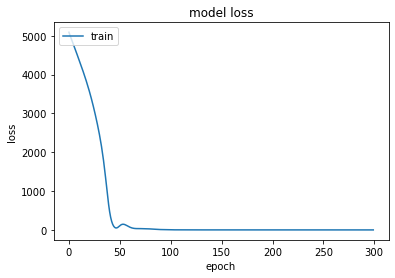

In [200]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [201]:
# %tensorboard --logdir logs

In [206]:
def forecast(k,n,days):
    op_seq=[]
    init_pred=model.predict(X[-1:])
    op_seq.append(init_pred[0])
    ip_seq=X[-1:].reshape((1,(np.product(X[-1:].shape))))[0]
    np.append(ip_seq,init_pred[0])
    
    for i in range(1,days,1):
        endidx=i+k
        ip=ip_seq[i-1:endidx]
        ip=np.array(ip)
        ip=ip.reshape((1,k,n))
        pred=model.predict(ip)
        ip_seq=np.append(ip_seq,pred[0])
        op_seq=np.append(op_seq,pred[0])
    return ip_seq,op_seq

In [207]:
ip_seq,op_seq=forecast(k,n,10)
ip_seq,op_seq

(array([ 60.      ,  70.      ,  80.      ,  90.01763 , 100.706566,
        112.27327 , 124.759766, 138.35484 , 153.19922 , 169.41328 ,
        187.15952 , 206.61859 ], dtype=float32),
 array([ 90.01763 ,  90.01763 , 100.706566, 112.27327 , 124.759766,
        138.35484 , 153.19922 , 169.41328 , 187.15952 , 206.61859 ],
       dtype=float32))

In [208]:
def plot_forecast(timeseries_data,op_seq):
    seq=np.concatenate((np.array(timeseries_data),op_seq))
    plt.plot(seq)
    plt.show()

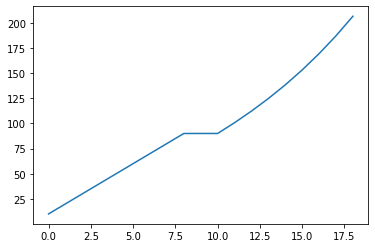

In [209]:
plot_forecast(timeseries_data,op_seq)

'2.3.0'